# Importing Required Libraries

In [812]:
# For Data Analysis and Data Wrangling
import numpy  as np
import pandas as pd

# For visulaization
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

# ML Libraries
import sklearn

from sklearn.preprocessing import StandardScaler, LabelEncoder

from imblearn.over_sampling import SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

In [813]:
# Suppress Warnings

import warnings 
warnings.filterwarnings('ignore')

# Loading data

In [814]:
from tkinter import *
from tkinter import filedialog
filepath = filedialog.askopenfilename()
bank = pd.read_csv(filepath, sep = ";")

In [815]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [816]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


# Analyzing the data

In [817]:
# Dimensions of the data in hand

print("Dimesnion of the Data: ", bank.shape)
print("Size of the Data:      ", bank.size)

Dimesnion of the Data:  (4521, 17)
Size of the Data:       76857


In [818]:
# Summary Statistics for each numerical column

bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## 1- Missing Values Analysis

In [819]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [820]:
# Encoding "Yes" as 1 and "No" as 0 in the response variable

bank["y"] = bank['y'].map({'no': 0, 'yes': 1})
bank["y"].value_counts()

0    4000
1     521
Name: y, dtype: int64

As evident from the information above, there are no missing values as of now in the data.

In [821]:
# Separating Categorical and Numerical Values

categorical_columns = bank.select_dtypes(exclude=['int', 'float']).columns
numerical_columns = bank.select_dtypes(include=['int', 'float']).columns

print(categorical_columns)
print(numerical_columns) 

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')


In [822]:
def categorical_info(df, cat_col):
    """
    INPUT: Takes input a dataframe and the name of the categorical columns 
    OUTPUT: A dataframe containing: 
            - column name 
            - values
            - count of unique values
    """
    
    df_result = pd.DataFrame(columns = ["columns", "values", "unique_values"])
    
    df_temp = pd.DataFrame()
    
    for value in cat_col:
        df_temp["columns"] = [value]
        df_temp["values"] = [df[value].unique()]
        df_temp["unique_values"] = df[value].nunique()
        
        df_result = df_result.append(df_temp)
    
    df_result.set_index("columns" ,inplace = True)
    
    return df_result

In [823]:
df_categorical = categorical_info(bank, categorical_columns)
df_categorical

,values,unique_values
columns,,
job,"[unemployed, services, management, blue-collar...",12
marital,"[married, single, divorced]",3
education,"[primary, secondary, tertiary, unknown]",4
default,"[no, yes]",2
housing,"[no, yes]",2
loan,"[no, yes]",2
contact,"[cellular, unknown, telephone]",3
month,"[oct, may, apr, jun, feb, aug, jan, jul, nov, ...",12
poutcome,"[unknown, failure, other, success]",4


In [824]:
bank["poutcome"].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [825]:
bank["contact"].value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [826]:
bank["education"].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

Since , "unknown" comprises of good proportion of the data, so we keep it as a category rather than manipulating it.

## 2- Univariate EDA

### - Data Imbalance

In [827]:
y = bank["y"].value_counts().sort_values(ascending = False).to_frame().reset_index()
y.columns = ["Unique Values", "Counts"]
y

,Unique Values,Counts
0,0,4000
1,1,521


Here, the data seems to be highly imbalanced. A better way to see this is to visualize it using a plot as follows:

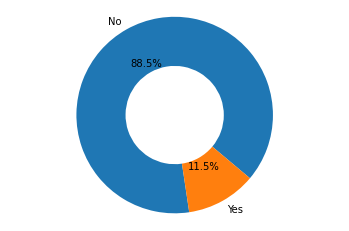

In [828]:
fig, ax = plt.subplots()
ax.pie(y["Counts"], labels = ["No", "Yes"], wedgeprops = dict(width = 0.5), startangle = -40, autopct = "%1.1f%%")
ax.axis("equal")

plt.show()

So, there are aprrox. 89% of "No" labels in the response variable. Hence the data is highly imbalanced.

## Graphical Visualizations

### i) For Categorical Data

In [829]:
# Recalling all categorical columns
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [830]:
# Defining a fn for univariate categorical analysis

def univariate_categorical(data, col):
    
    # DataFrame for all the relevant info
    df_val = data[col].value_counts().to_frame().reset_index()
    df_val.columns = [col, "Total Customers"]
    df_val["% Values"] = df_val["Total Customers"] * 100 / df_val["Total Customers"].sum()
    
    df_ = data.groupby(col)["y"].sum().reset_index()
    df_.columns = [col, "Customers Subscribed"]
    
    df_val = pd.merge(df_val, df_, on = col)
    df_val["Customers Not Subscribed"] = df_val["Total Customers"] - df_val["Customers Subscribed"]
    df_val["Subscription %"] = df_val["Customers Subscribed"] * 100 / (df_val["Customers Subscribed"] + df_val["Customers Not Subscribed"])
    df_val.sort_values(by = "Subscription %", inplace = True, ascending = False)
    print( df_val )

    # First Graph
    plt.figure(figsize = (12, 6))
    plt.subplots_adjust(wspace = 0.5)

    plt.subplot(1, 2, 1)
    sns.countplot(x = col, hue = "y", data = bank)
    plt.legend(title = "", labels = ["Customers Not Subscribed", "Customers Subscribed"])
    plt.xticks(rotation = 90)

    # Second Graph
    plt.subplot(1, 2, 2)
    sns.barplot(x = col, y = "Subscription %", data = df_val)
    plt.xticks(rotation = 90)

    plt.show()

#### Col: Job

              job  Total Customers   % Values  Customers Subscribed  \
5         retired              230   5.087370                    54   
10        student               84   1.857996                    19   
11        unknown               38   0.840522                     7   
0      management              969  21.433311                   131   
9       housemaid              112   2.477328                    14   
3          admin.              478  10.572882                    58   
6   self-employed              183   4.047777                    20   
2      technician              768  16.987392                    83   
8      unemployed              128   2.831232                    13   
4        services              417   9.223623                    38   
7    entrepreneur              168   3.715992                    15   
1     blue-collar              946  20.924574                    69   

    Customers Not Subscribed  Subscription %  
5                        176 

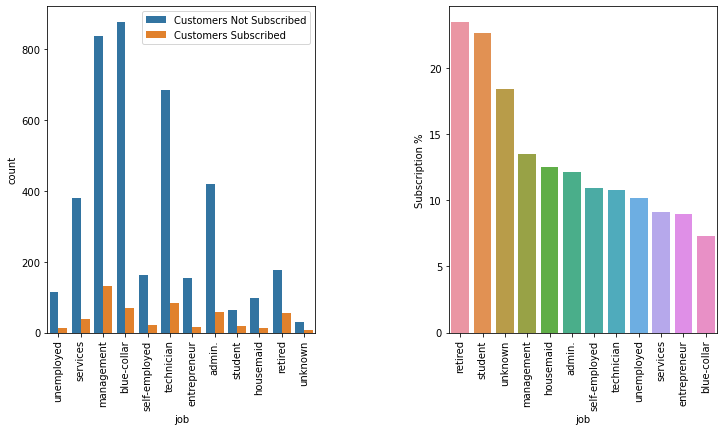

In [831]:
univariate_categorical(bank, "job")

#### Col: Marital

    marital  Total Customers   % Values  Customers Subscribed  \
2  divorced              528  11.678832                    77   
1    single             1196  26.454324                   167   
0   married             2797  61.866844                   277   

   Customers Not Subscribed  Subscription %  
2                       451       14.583333  
1                      1029       13.963211  
0                      2520        9.903468  


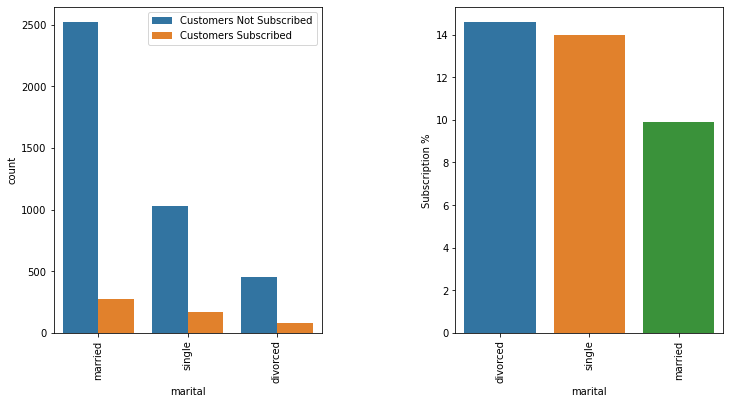

In [832]:
univariate_categorical(bank, "marital")

#### Col: Education

   education  Total Customers   % Values  Customers Subscribed  \
1   tertiary             1350  29.860650                   193   
0  secondary             2306  51.006415                   245   
3    unknown              187   4.136253                    19   
2    primary              678  14.996682                    64   

   Customers Not Subscribed  Subscription %  
1                      1157       14.296296  
0                      2061       10.624458  
3                       168       10.160428  
2                       614        9.439528  


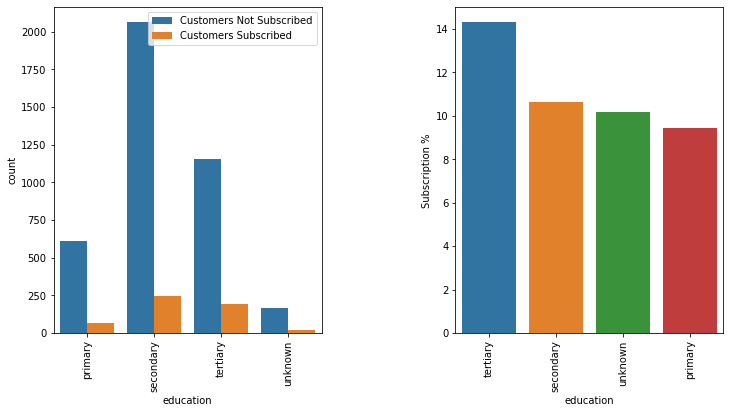

In [833]:
univariate_categorical(bank, "education")

#### Col: Default

  default  Total Customers   % Values  Customers Subscribed  \
1     yes               76   1.681044                     9   
0      no             4445  98.318956                   512   

   Customers Not Subscribed  Subscription %  
1                        67       11.842105  
0                      3933       11.518560  


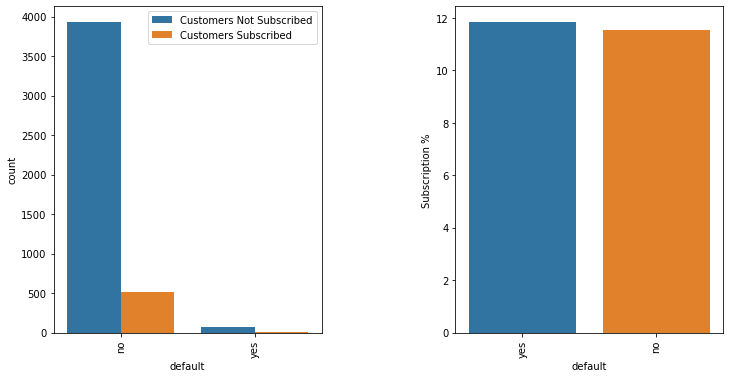

In [834]:
univariate_categorical(bank, "default")

#### Col: Housing

  housing  Total Customers   % Values  Customers Subscribed  \
1      no             1962  43.397478                   301   
0     yes             2559  56.602522                   220   

   Customers Not Subscribed  Subscription %  
1                      1661       15.341488  
0                      2339        8.597108  


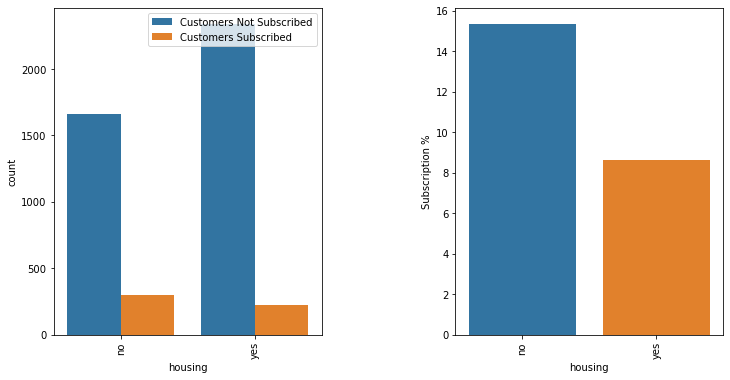

In [835]:
univariate_categorical(bank, "housing")

#### Col: Loan

  loan  Total Customers   % Values  Customers Subscribed  \
0   no             3830  84.715771                   478   
1  yes              691  15.284229                    43   

   Customers Not Subscribed  Subscription %  
0                      3352       12.480418  
1                       648        6.222865  


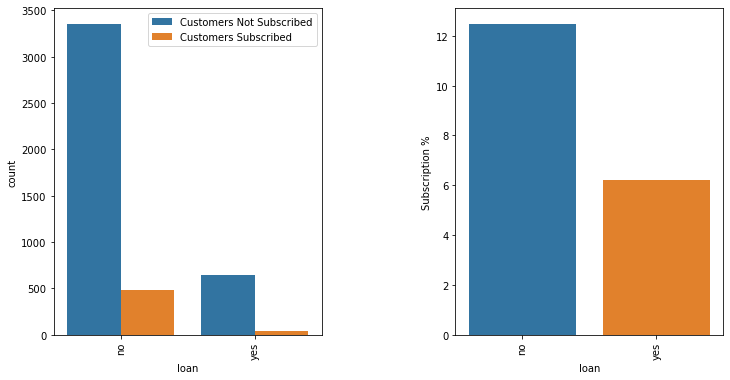

In [836]:
univariate_categorical(bank, "loan")

#### Col: Contact

     contact  Total Customers   % Values  Customers Subscribed  \
2  telephone              301   6.657819                    44   
0   cellular             2896  64.056625                   416   
1    unknown             1324  29.285556                    61   

   Customers Not Subscribed  Subscription %  
2                       257       14.617940  
0                      2480       14.364641  
1                      1263        4.607251  


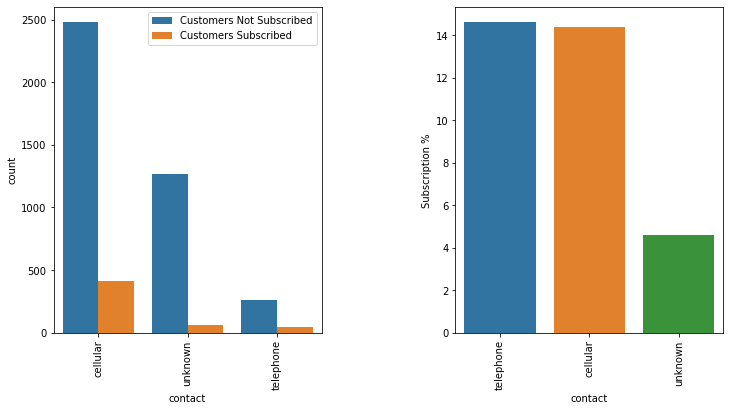

In [837]:
univariate_categorical(bank, "contact")

#### Col: Month 

   month  Total Customers   % Values  Customers Subscribed  \
8    oct               80   1.769520                    37   
11   dec               20   0.442380                     9   
10   mar               49   1.083831                    21   
9    sep               52   1.150188                    17   
5    apr              293   6.480867                    56   
6    feb              222   4.910418                    38   
2    aug              633  14.001327                    79   
7    jan              148   3.273612                    16   
3    jun              531  11.745189                    55   
4    nov              389   8.604291                    39   
1    jul              706  15.616014                    61   
0    may             1398  30.922362                    93   

    Customers Not Subscribed  Subscription %  
8                         43       46.250000  
11                        11       45.000000  
10                        28       42.857143  
9    

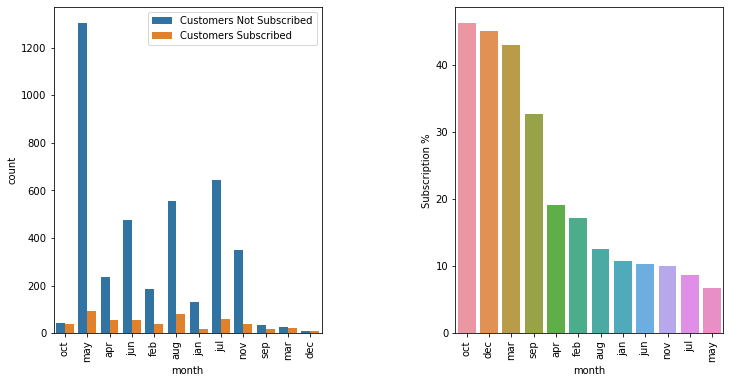

In [838]:
univariate_categorical(bank, "month")

#### Col: poutcome

  poutcome  Total Customers   % Values  Customers Subscribed  \
3  success              129   2.853351                    83   
2    other              197   4.357443                    38   
1  failure              490  10.838310                    63   
0  unknown             3705  81.950896                   337   

   Customers Not Subscribed  Subscription %  
3                        46       64.341085  
2                       159       19.289340  
1                       427       12.857143  
0                      3368        9.095816  


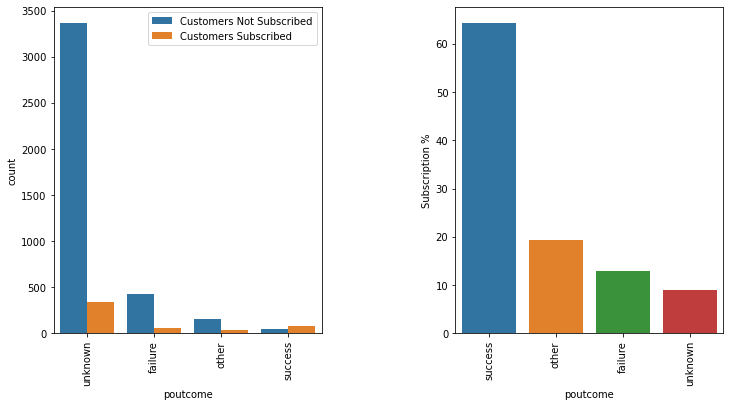

In [839]:
univariate_categorical(bank, "poutcome")

### ii) For Numerical Data

In [840]:
# Recalling all categorical columns
numerical_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

#### Col: Age

<AxesSubplot:xlabel='y', ylabel='age'>

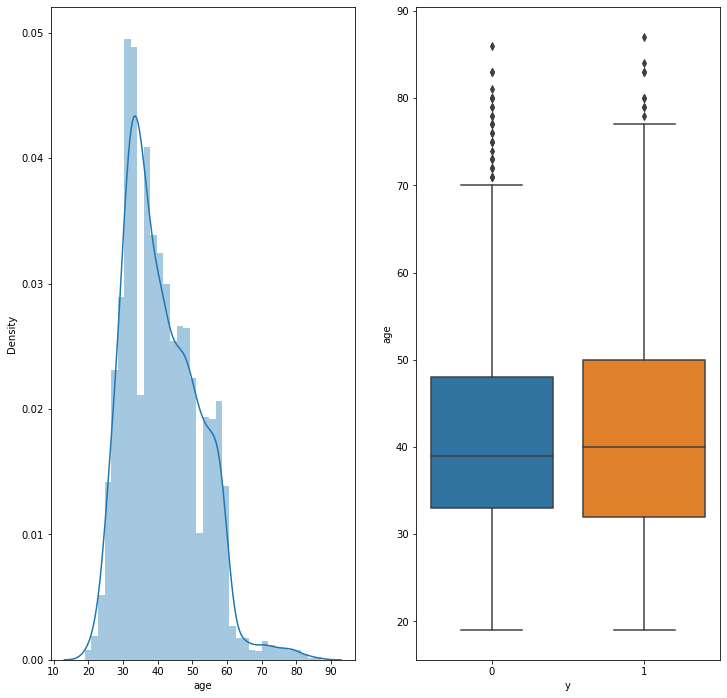

In [841]:
plt.figure(figsize=(12,12))

plt.subplot(1, 2, 1)
sns.distplot(bank["age"])

plt.subplot(1, 2, 2)
sns.boxplot(y = bank["age"], x = bank["y"])

#### Col: Balance

<AxesSubplot:xlabel='y', ylabel='balance'>

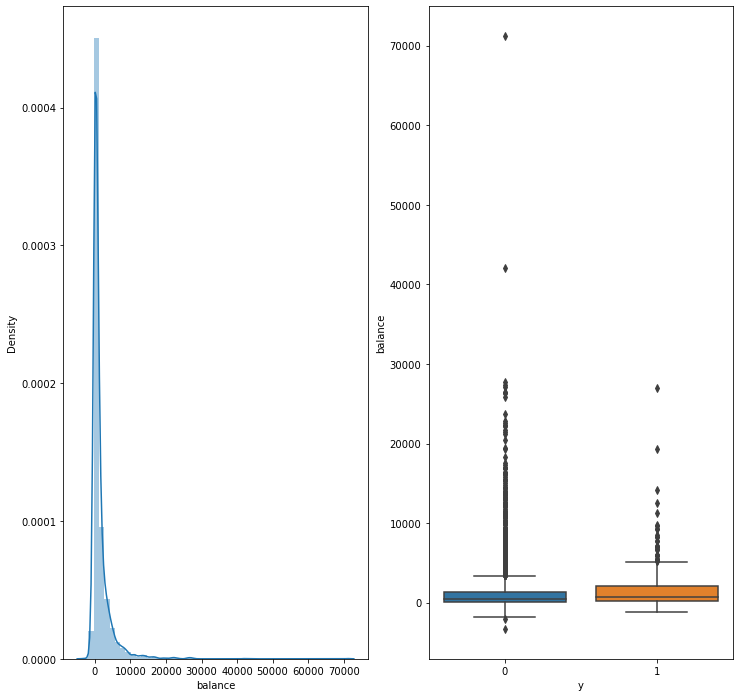

In [842]:
plt.figure(figsize=(12,12))

plt.subplot(1, 2, 1)
sns.distplot(bank["balance"])

plt.subplot(1, 2, 2)
sns.boxplot(y = bank["balance"], x = bank["y"])

#### Col: Day

<AxesSubplot:xlabel='y', ylabel='day'>

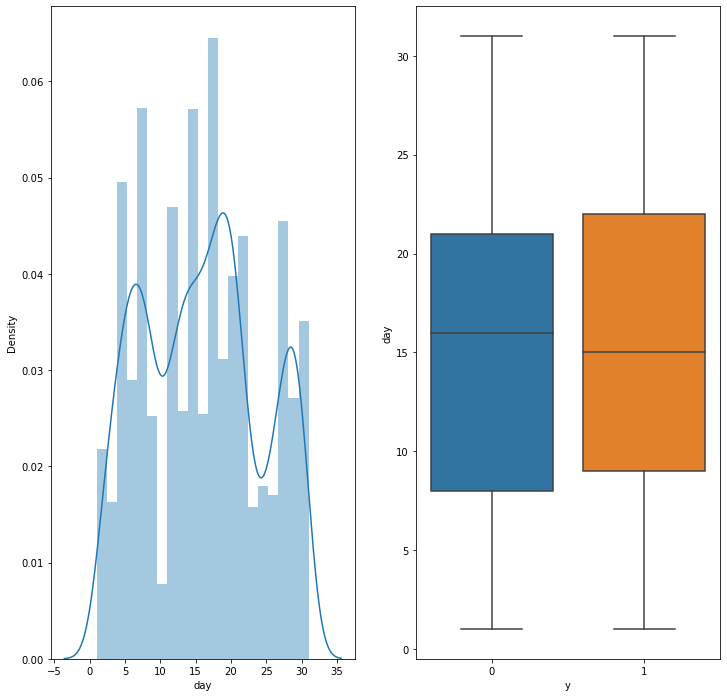

In [843]:
plt.figure(figsize=(12,12))

plt.subplot(1, 2, 1)
sns.distplot(bank["day"])

plt.subplot(1, 2, 2)
sns.boxplot(y = bank["day"], x = bank["y"])

#### Col: Duration

<AxesSubplot:xlabel='y', ylabel='duration'>

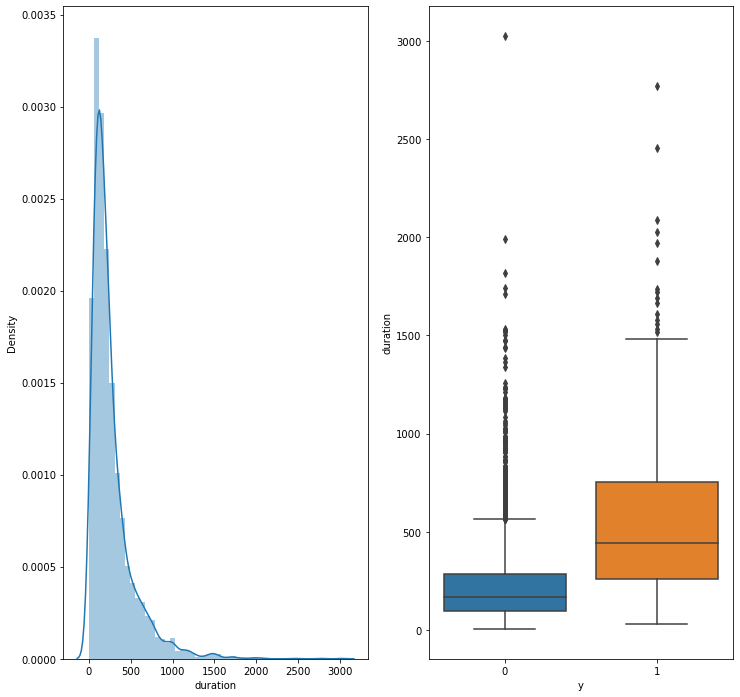

In [844]:
plt.figure(figsize=(12,12))

plt.subplot(1, 2, 1)
sns.distplot(bank["duration"])

plt.subplot(1, 2, 2)
sns.boxplot(y = bank["duration"], x = bank["y"])

#### Col: Campaign

<AxesSubplot:xlabel='y', ylabel='campaign'>

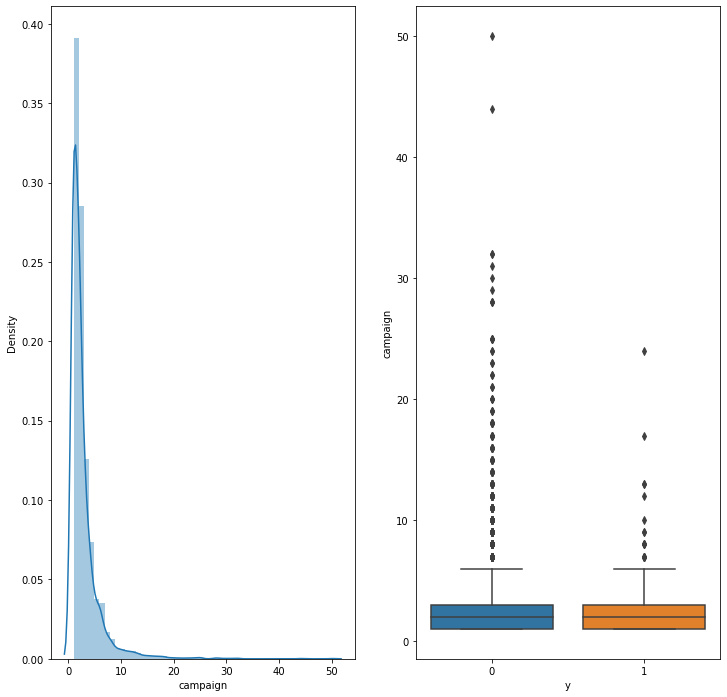

In [845]:
plt.figure(figsize=(12,12))

plt.subplot(1, 2, 1)
sns.distplot(bank["campaign"])

plt.subplot(1, 2, 2)
sns.boxplot(y = bank["campaign"], x = bank["y"])

#### Col: pdays

<AxesSubplot:xlabel='y', ylabel='pdays'>

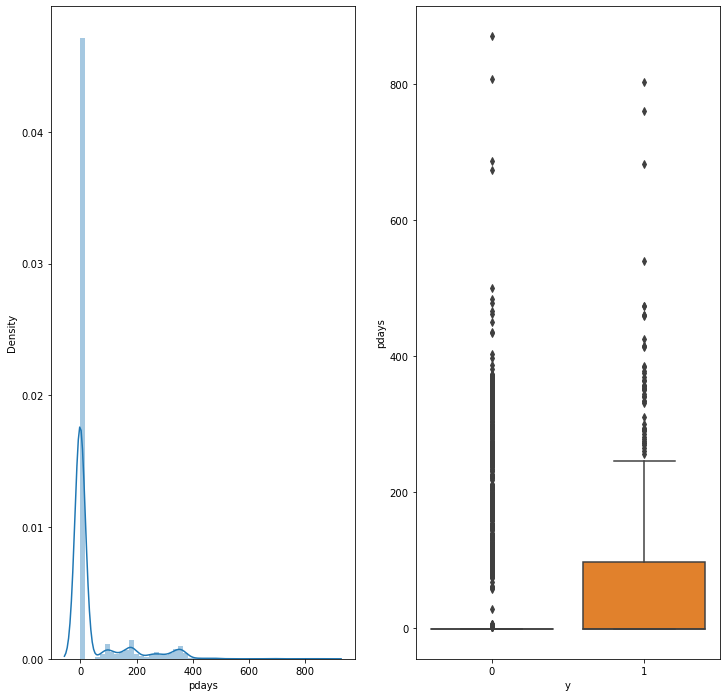

In [846]:
plt.figure(figsize=(12,12))

plt.subplot(1, 2, 1)
sns.distplot(bank["pdays"])

plt.subplot(1, 2, 2)
sns.boxplot(y = bank["pdays"], x = bank["y"])

#### Col: previous

<AxesSubplot:xlabel='y', ylabel='previous'>

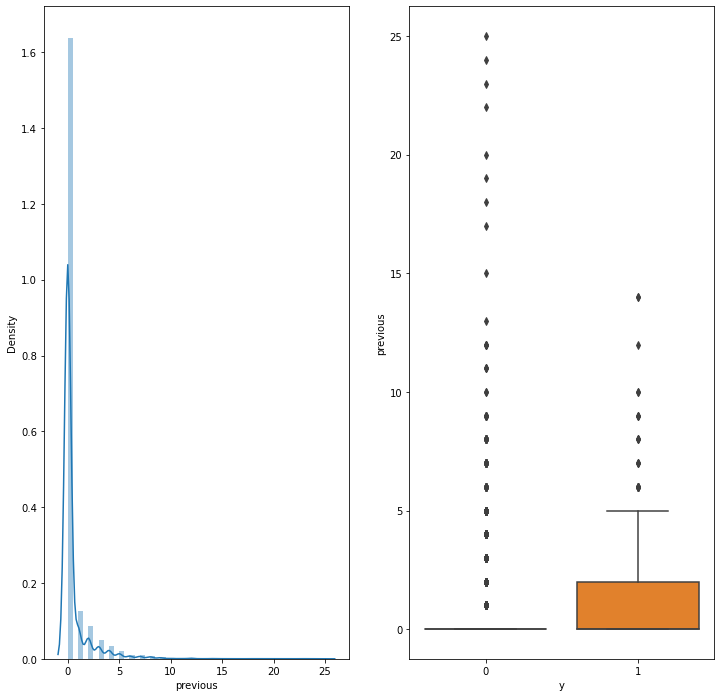

In [847]:
plt.figure(figsize=(12,12))

plt.subplot(1, 2, 1)
sns.distplot(bank["previous"])

plt.subplot(1, 2, 2)
sns.boxplot(y = bank["previous"], x = bank["y"])

## 3- Bivariate Analysis

In [848]:
numerical_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

In [849]:
bank[numerical_columns]

,age,balance,day,duration,campaign,pdays,previous,y
0,30,1787,19,79,1,-1,0,0
1,33,4789,11,220,1,339,4,0
2,35,1350,16,185,1,330,1,0
3,30,1476,3,199,4,-1,0,0
4,59,0,5,226,1,-1,0,0
...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0
4517,57,-3313,9,153,1,-1,0,0
4518,57,295,19,151,11,-1,0,0
4519,28,1137,6,129,4,211,3,0


<Figure size 1440x1440 with 0 Axes>

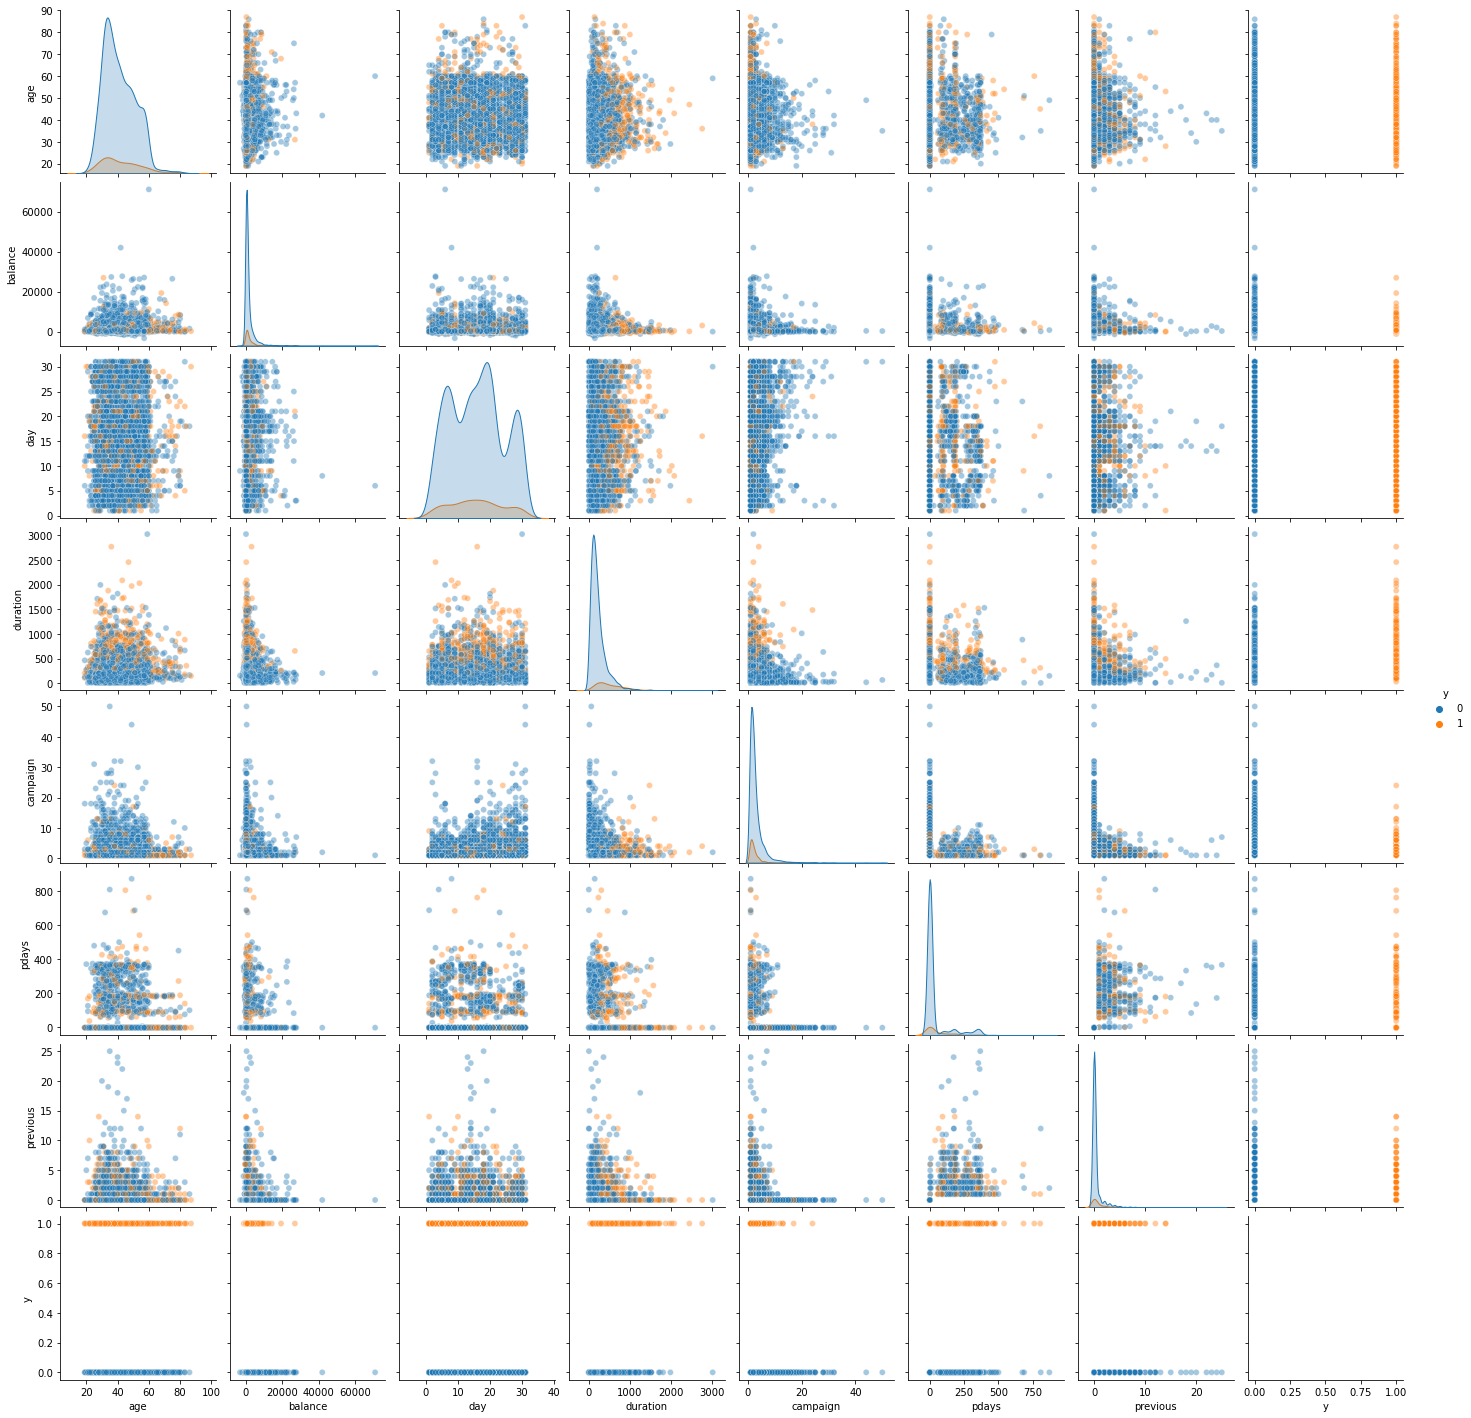

In [850]:
plt.figure(figsize = (20, 20))
sns.pairplot(data = bank, x_vars = numerical_columns, y_vars = numerical_columns, hue = "y", kind = "scatter", plot_kws = {"alpha": 0.4})
plt.show()

# Data Preparation

## i) For Logistic Classifier

In [851]:
bank1 = bank

### - Outliers Treatment

In [852]:
bank.describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,age,balance,day,duration,campaign,pdays,previous,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,0.115240
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
10%,29.000000,0.000000,5.000000,58.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
90%,56.000000,3913.000000,28.000000,579.000000,6.000000,183.000000,2.000000,1.000000
95%,59.000000,6102.000000,30.000000,763.000000,8.000000,317.000000,3.000000,1.000000


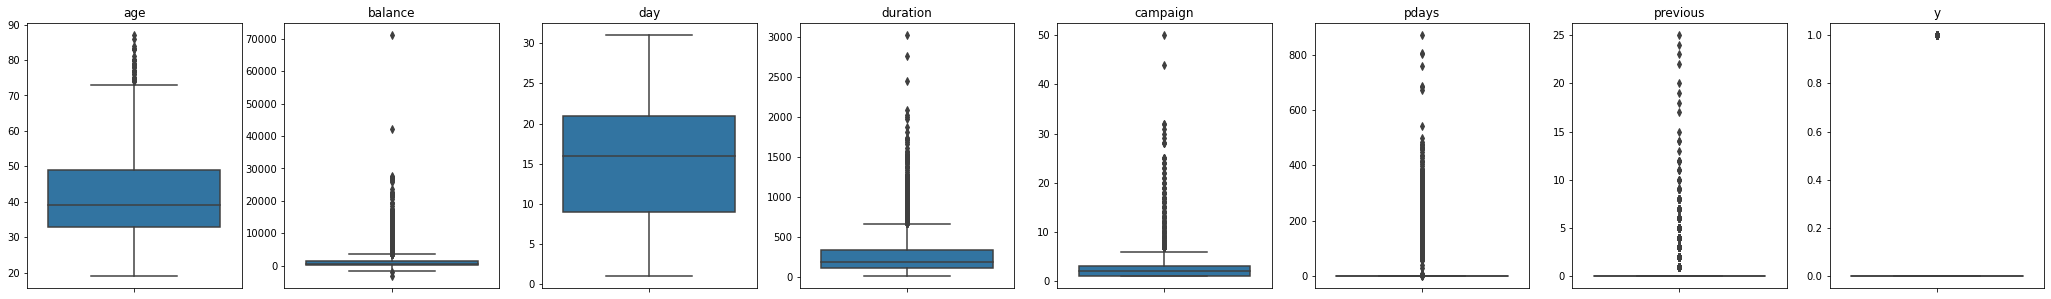

In [853]:
# Plotting graph to visualize and treat outliers

i=1
plt.figure(figsize=[50,40])
for col in numerical_columns:
    plt.subplot(7,11,i)
    sns.boxplot(y=bank[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

Since, Logistic Regression is heavily influenced by outliers. Here we treat the outliers nevertheless they represent some true scenario.(Here we are considering any points beyond the 99th percentile as outliers). Let's use 99th-percentile capping to replace the extreme values.

In [854]:
# Capping the data to eliminate the effect of the outlier

Q4 = bank1["age"].quantile(0.90)
print("Total number of outliers that needs to be capped: {}".format(len(bank1[bank1["age"] >= Q4])))
bank1.loc[ bank1["age"]>=Q4, "age"] = Q4

Q4 = bank1["balance"].quantile(0.90)
print("Total number of outliers that needs to be capped: {}".format(len(bank1[bank1["balance"] >= Q4])))
bank1.loc[ bank1["balance"]>=Q4, "balance"] = Q4

Q4 = bank1["duration"].quantile(0.90)
print("Total number of outliers that needs to be capped: {}".format(len(bank1[bank1["duration"] >= Q4])))
bank1.loc[ bank1["duration"]>=Q4, "duration"] = Q4

Q4 = bank1["campaign"].quantile(0.90)
print("Total number of outliers that needs to be capped: {}".format(len(bank1[bank1["campaign"] >= Q4])))
bank1.loc[ bank1["campaign"]>=Q4, "campaign"] = Q4

Q4 = bank1["pdays"].quantile(0.90)
print("Total number of outliers that needs to be capped: {}".format(len(bank1[bank1["pdays"] >= Q4])))
bank1.loc[ bank1["pdays"]>=Q4, "pdays"] = Q4

Q4 = bank1["previous"].quantile(0.90)
print("Total number of outliers that needs to be capped: {}".format(len(bank1[bank1["previous"] >= Q4])))
bank1.loc[ bank1["previous"]>=Q4, "previous"] = Q4

Total number of outliers that needs to be capped: 495
Total number of outliers that needs to be capped: 454
Total number of outliers that needs to be capped: 453
Total number of outliers that needs to be capped: 473
Total number of outliers that needs to be capped: 453
Total number of outliers that needs to be capped: 530


Again plotting to see the impact of capping done.

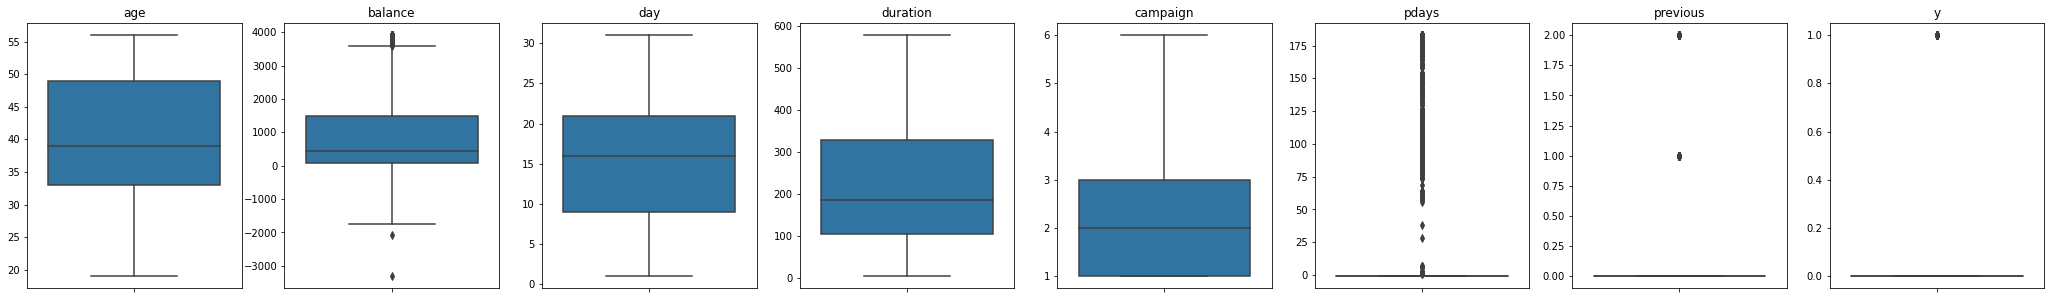

In [855]:
i=1
plt.figure(figsize=[50,40])
for col in numerical_columns:
    plt.subplot(7,11,i)
    sns.boxplot(y=bank[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

In [856]:
bank1.describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,age,balance,day,duration,campaign,pdays,previous,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,40.637248,1006.499226,15.915284,234.245300,2.412962,27.443265,0.297722,0.115240
std,9.418668,1313.211232,8.247667,169.126635,1.622028,63.170309,0.666065,0.319347
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
10%,29.000000,0.000000,5.000000,58.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
90%,56.000000,3913.000000,28.000000,579.000000,6.000000,183.000000,2.000000,1.000000
95%,56.000000,3913.000000,30.000000,579.000000,6.000000,183.000000,2.000000,1.000000


### - Converting Binary Categories

In [857]:
df_categorical

,values,unique_values
columns,,
job,"[unemployed, services, management, blue-collar...",12
marital,"[married, single, divorced]",3
education,"[primary, secondary, tertiary, unknown]",4
default,"[no, yes]",2
housing,"[no, yes]",2
loan,"[no, yes]",2
contact,"[cellular, unknown, telephone]",3
month,"[oct, may, apr, jun, feb, aug, jan, jul, nov, ...",12
poutcome,"[unknown, failure, other, success]",4


In [858]:
bank1.nunique().sort_values()

y               2
loan            2
housing         2
default         2
previous        3
contact         3
marital         3
education       4
poutcome        4
campaign        6
month          12
job            12
day            31
age            38
pdays         117
duration      551
balance      1924
dtype: int64

In [859]:
# Function to map "Yes" to 1 and "No" to 0

def binary_map(col):
    return col.map({"yes": 1, "no":0})

In [860]:
bank1["loan"] = binary_map( bank1["loan"] )
bank1["loan"].value_counts()

0    3830
1     691
Name: loan, dtype: int64

In [861]:
bank1["housing"] = binary_map( bank1["housing"] )
bank1["housing"].value_counts()

1    2559
0    1962
Name: housing, dtype: int64

In [862]:
bank1["default"] = binary_map( bank1["default"] )
bank1["default"].value_counts()

0    4445
1      76
Name: default, dtype: int64

### - Dummy Categories

In [863]:
df_categorical

,values,unique_values
columns,,
job,"[unemployed, services, management, blue-collar...",12
marital,"[married, single, divorced]",3
education,"[primary, secondary, tertiary, unknown]",4
default,"[no, yes]",2
housing,"[no, yes]",2
loan,"[no, yes]",2
contact,"[cellular, unknown, telephone]",3
month,"[oct, may, apr, jun, feb, aug, jan, jul, nov, ...",12
poutcome,"[unknown, failure, other, success]",4


In [864]:
dummy1 = pd.get_dummies(bank1[categorical_columns], drop_first = True)

bank1 = pd.concat([bank1, dummy1], axis = 1)
bank1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,...,0,0,0,0,0,1,0,0,0,1
1,33,services,married,secondary,0,3913,1,1,cellular,11,...,0,0,0,1,0,0,0,0,0,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,...,0,0,0,0,0,0,0,0,0,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,...,0,1,0,0,0,0,0,0,0,1
4,56,blue-collar,married,secondary,0,0,1,0,unknown,5,...,0,0,0,1,0,0,0,0,0,1


In [865]:
bank1.drop(categorical_columns, axis = 1, inplace = True)
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   day                  4521 non-null   int64
 3   duration             4521 non-null   int64
 4   campaign             4521 non-null   int64
 5   pdays                4521 non-null   int64
 6   previous             4521 non-null   int64
 7   y                    4521 non-null   int64
 8   job_blue-collar      4521 non-null   uint8
 9   job_entrepreneur     4521 non-null   uint8
 10  job_housemaid        4521 non-null   uint8
 11  job_management       4521 non-null   uint8
 12  job_retired          4521 non-null   uint8
 13  job_self-employed    4521 non-null   uint8
 14  job_services         4521 non-null   uint8
 15  job_student          4521 non-null   uint8
 16  job_technician       452

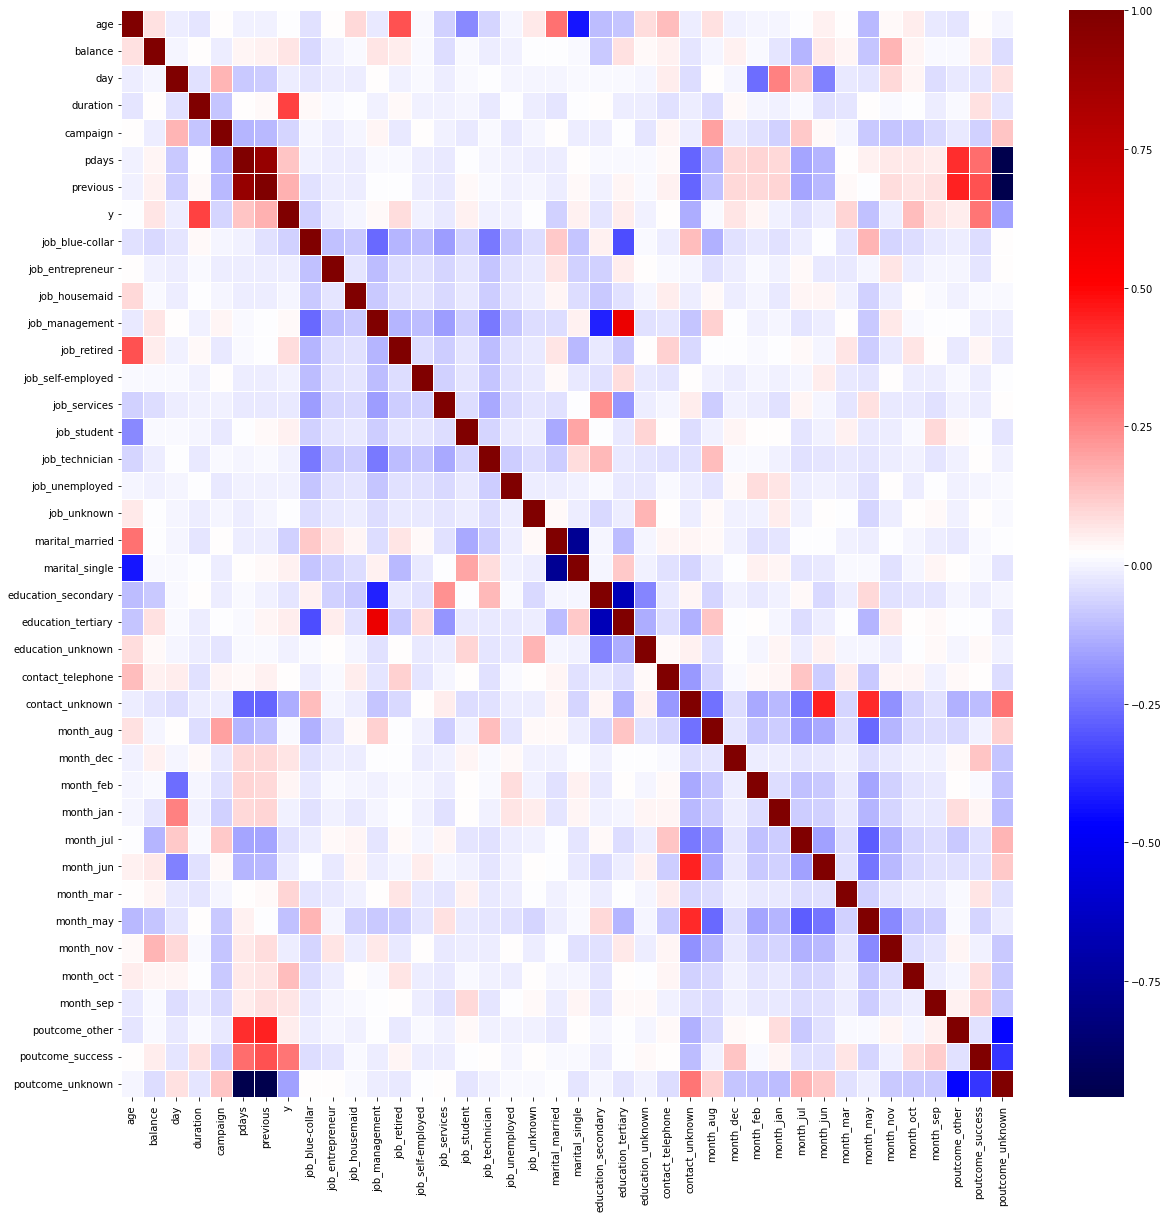

In [866]:
# Visualizing the correlation among features data using heatmap

plt.figure(figsize = (20, 20))
sns.heatmap(bank1.corr(), cmap = "seismic", linewidth = 0.5)
plt.show()

Since, there are lots of columns now after one-hot encoding. So, seeing the top correlated variables(in both positive and negative direction.)

In [867]:
corr_bank1 = bank1.corr()
corr_bank1 = corr_bank1.where( np.triu(np.ones(corr_bank1.shape), k = 1).astype(np.bool) )
corr_df = corr_bank1.unstack().reset_index() 

corr_df.columns = ["Variable 1", "Variable 2", "Correlation"]
corr_df.dropna(subset = ["Correlation"], inplace = True)

corr_df.sort_values(by = "Correlation", ascending = False, inplace = True)

In [868]:
corr_df.head()

,Variable 1,Variable 2,Correlation
245,previous,pdays,0.909580
891,education_tertiary,job_management,0.586132
1486,poutcome_other,previous,0.446332
1265,month_jun,contact_unknown,0.444592
1345,month_may,contact_unknown,0.431803


In [869]:
corr_df.tail()

,Variable 1,Variable 2,Correlation
1597,poutcome_unknown,poutcome_other,-0.454820
901,education_tertiary,education_secondary,-0.665751
819,marital_single,marital_married,-0.763919
1566,poutcome_unknown,previous,-0.952557
1565,poutcome_unknown,pdays,-0.959541


### Train-Test Split

In [870]:
Y = bank1["y"]
X = bank1.drop("y", axis = 1)

In [871]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7,  test_size = 0.3, random_state = 69 )

In [872]:
# Checking the shape of the created Train & Test DFs

print(" Shape of X_train is : ",X_train.shape)
print(" Shape of Y_train is : ",Y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of Y_test is  : ",Y_test.shape)

 Shape of X_train is :  (3164, 39)
 Shape of Y_train is :  (3164,)
 Shape of X_test is  :  (1357, 39)
 Shape of Y_test is  :  (1357,)


Converting binary categories in the test data and using the same dummy conversion in the test data too

It is quite evident from the test data that it doesn't have all categories corresponding to each categorical variables. So, appending all the rest columns that are in train data but not in test data to test data  and filling it by zeros. 

### - Feature Scaling

In [873]:
num_cols = numerical_columns.drop("y")
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [874]:
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform( X_train[num_cols] )
X_train

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
670,-0.061677,2.221090,-0.604114,-0.721443,-0.869541,-0.441594,-0.441050,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2104,-0.273219,0.380349,-1.088415,0.560219,-0.869541,2.521383,1.061083,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4416,-0.907843,-0.158068,-0.240888,1.936382,-0.869541,-0.441594,-0.441050,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3431,-1.330926,-0.662738,0.848790,2.030882,-0.256386,-0.441594,-0.441050,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2245,0.467176,-0.691883,-1.209490,-0.750975,-0.869541,-0.441594,-0.441050,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,-0.484760,-0.297658,1.575242,-0.745068,-0.869541,2.521383,1.061083,0,0,0,...,0,0,0,0,0,0,0,0,0,0
439,0.361406,-0.763212,-1.209490,0.176311,-0.256386,-0.441594,-0.441050,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1626,1.524883,-0.780085,1.696317,-0.686006,-0.256386,-0.441594,-0.441050,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2667,-1.330926,-0.747105,0.364489,-0.266660,-0.869541,-0.441594,-0.441050,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [875]:
# Checking if features are scaled or not
X_train[num_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,3.164000e+03,3.164000e+03,3.164000e+03,3.164000e+03,3.164000e+03,3.164000e+03,3.164000e+03
mean,3.466464e-16,-4.363345e-17,-1.786041e-17,1.133031e-16,-7.193291e-18,-7.968763e-17,3.929993e-17
std,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00
min,-2.282862e+00,-2.376928e+00,-1.814867e+00,-1.365228e+00,-8.695412e-01,-4.415944e-01,-4.410499e-01
25%,-8.020722e-01,-7.217952e-01,-8.462645e-01,-7.745998e-01,-8.695412e-01,-4.415944e-01,-4.410499e-01
50%,-1.674480e-01,-4.280436e-01,1.262796e-03,-2.843787e-01,-2.563858e-01,-4.415944e-01,-4.410499e-01
75%,8.902590e-01,3.705697e-01,6.066394e-01,5.602191e-01,3.567696e-01,-4.415944e-01,-4.410499e-01
max,1.630654e+00,2.221090e+00,1.817393e+00,2.030882e+00,2.196236e+00,2.521383e+00,2.563217e+00


### - Feature Reduction (using RFECV) and Model Fitting

In [876]:
kbest = SelectKBest(score_func = f_classif, k = 20)
X_train_selected = kbest.fit_transform(X_train, Y_train)

X_test[num_cols] = scaler.transform( X_test[num_cols] )
X_test_selected = kbest.transform( X_test )

print("The selected features using K Best Selection are as follows: ")
X_train.columns[kbest.get_support()]

The selected features using K Best Selection are as follows: 


Index(['balance', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_retired', 'job_services', 'marital_married',
       'education_tertiary', 'contact_unknown', 'month_dec', 'month_feb',
       'month_mar', 'month_may', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

### Fitting the Model  with Logisitic Regression (without treating imbalanced class)

In [877]:
logreg = LogisticRegression()
logreg.fit(X_train_selected, Y_train)

LogisticRegression()

Choosing a good decision boundary (with the goal of maximising the precision)
Why precision?
Because it tells, out of all predicted subscribed, how many have actually subscribed. And low precision means losing customers in believing the model that customers have subscribed but actually they haven't.

In [878]:
Y_pred1 = logreg.predict_proba(X_train_selected)
Y_pred1 = pd.DataFrame( Y_pred1[:, 1] )
Y_pred1.columns = ["Subscription_Prob"]
Y_pred1

,Subscription_Prob
0,0.014818
1,0.083506
2,0.234661
3,0.465485
4,0.008972
...,...
3159,0.030670
3160,0.072506
3161,0.005397
3162,0.010970


In [879]:
# Finding the optimal decision boundary

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    Y_pred1[i] = Y_pred1.Subscription_Prob.map(lambda x: 1 if x > i else 0)

Y_pred1.head()

,Subscription_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.014818,1,0,0,0,0,0,0,0,0,0
1,0.083506,1,0,0,0,0,0,0,0,0,0
2,0.234661,1,1,1,0,0,0,0,0,0,0
3,0.465485,1,1,1,1,1,0,0,0,0,0
4,0.008972,1,0,0,0,0,0,0,0,0,0


In [880]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ["Prob", "Accuracy", "Sensi", "Speci", "Precision", "Recall"] )

num = [float(x)/10 for x in range(10)]

for i in num:
    cm1 = metrics.confusion_matrix(Y_train, Y_pred1[i])
    total1 = sum(sum(cm1))
    
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(Y_train, Y_pred1[i])
    
    cutoff_df.loc[i,] = [i,  accuracy, sensi, speci, prec[1], rec[1]]
cutoff_df
    

,Prob,Accuracy,Sensi,Speci,Precision,Recall
0.0,0.0,0.114728,1.0,0.0,1.0,0.0
0.1,0.1,0.798989,0.862259,0.790789,0.348165,0.862259
0.2,0.2,0.865992,0.69146,0.888611,0.445826,0.69146
0.3,0.3,0.886852,0.581267,0.926455,0.505995,0.581267
0.4,0.4,0.892857,0.413223,0.955016,0.543478,0.413223
0.5,0.5,0.89981,0.305785,0.976794,0.630682,0.305785
0.6,0.6,0.893173,0.168044,0.987147,0.628866,0.168044
0.7,0.7,0.891909,0.112948,0.99286,0.672131,0.112948
0.8,0.8,0.887484,0.055096,0.995359,0.606061,0.055096
0.9,0.9,0.885588,0.024793,0.997144,0.529412,0.024793


Choosing 0.5 as the decision boundary as it has good precision and not much low recall.

<Figure size 1296x576 with 0 Axes>

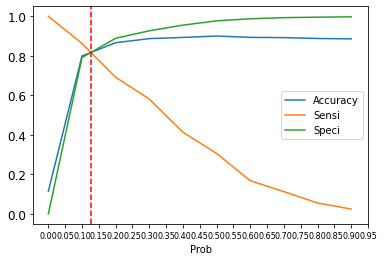

In [881]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(18,8))

cutoff_df.plot.line(x='Prob', y=['Accuracy','Sensi','Speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.126, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

Performance on Train Data

In [882]:
Y_train_pred1 = Y_pred1['Subscription_Prob'].map( lambda x: 1 if x > 0.126 else 0)
report = classification_report(Y_train, Y_train_pred1)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      2801
           1       0.38      0.82      0.52       363

    accuracy                           0.83      3164
   macro avg       0.68      0.83      0.71      3164
weighted avg       0.91      0.83      0.85      3164



In [883]:
def draw_cm( actual, predicted, cmap):
    """
    Calculate and plots the confusion matrix
    """
    
    cm = confusion_matrix(actual, predicted)
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title("Confusion Matrix")
    plt.show()

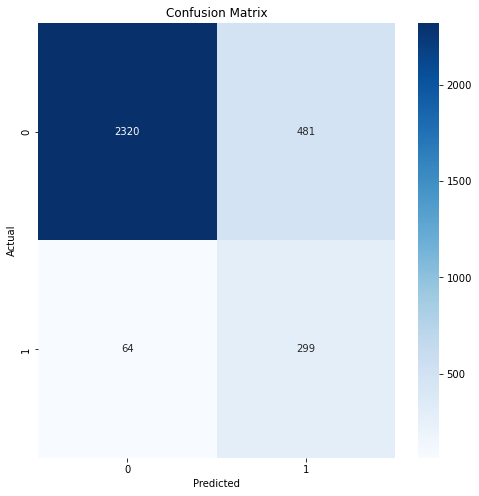

In [884]:
# Plotting the Confusion Matrix
draw_cm( Y_train, Y_train_pred1, "GnBu")

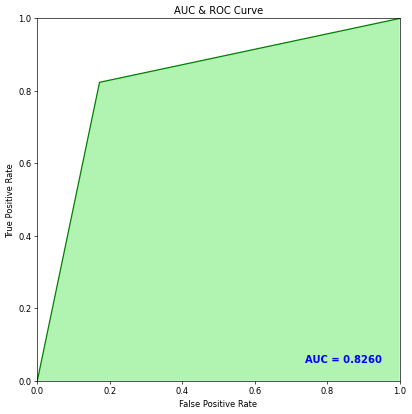

In [885]:
# Plotting ROC Curve

auc = metrics.roc_auc_score( Y_train, Y_train_pred1 )

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve( Y_train, Y_train_pred1 )

plt.figure(figsize=(12, 8), dpi=60)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [886]:
# Getting the cross validated score

threshold = 0.126
clf = LogisticRegression()

def get_cross_validated_score(X_train, Y_train, clf, threshold):
    stratified_k_fold = StratifiedKFold(n_splits=5)
    aucs = []
    for train_index, test_index in stratified_k_fold.split(X_train, Y_train):
        X_train_k, X_test_k = X_train[train_index], X_train[test_index]
        y_train_k, y_test_k = Y_train.iloc[train_index], Y_train.iloc[test_index]
        clf.fit(X_train_k, y_train_k)
        y_scores = clf.predict_proba(X_test_k)[:, 1]
        y_pred = np.where(y_scores > threshold, 1, 0)
        aucs.append(roc_auc_score(y_test_k, y_scores))

    return np.mean(aucs)

auc_roc = get_cross_validated_score(X_train_selected, Y_train, clf, threshold)
print("AUC ROC: ", auc_roc)


AUC ROC:  0.8921926403050497


#### Now let's take a look how our model works on the test dataset

In [887]:
Y_test_pred1 = logreg.predict_proba(X_test_selected)
Y_test_pred1 = pd.DataFrame( Y_test_pred1[:, 1] )
Y_test_pred1.columns = ["Subscription_Prob"]
Y_test_pred1

,Subscription_Prob
0,0.035650
1,0.325815
2,0.019954
3,0.025773
4,0.007061
...,...
1352,0.186457
1353,0.007318
1354,0.152570
1355,0.079467


Performance on Test Data

In [888]:
Y_test_pred1 = Y_test_pred1['Subscription_Prob'].map( lambda x: 1 if x > 0.126 else 0)
report = classification_report(Y_test, Y_test_pred1)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1199
           1       0.38      0.77      0.51       158

    accuracy                           0.83      1357
   macro avg       0.67      0.80      0.70      1357
weighted avg       0.90      0.83      0.85      1357



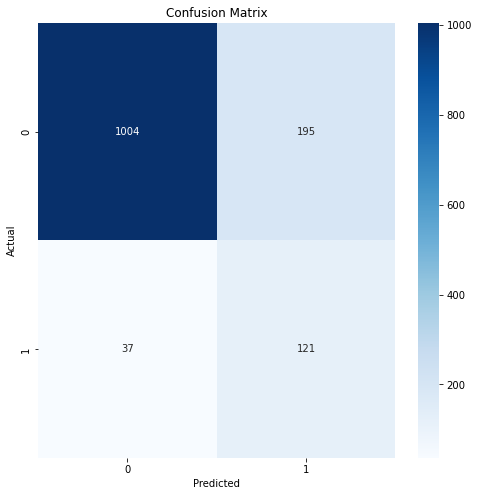

In [889]:
# Plotting the Confusion Matrix
draw_cm( Y_test, Y_test_pred1, "GnBu")

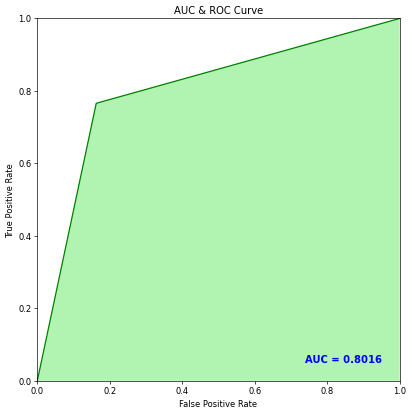

In [890]:
# Plotting ROC Curve

auc = metrics.roc_auc_score( Y_test, Y_test_pred1 )

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve( Y_test, Y_test_pred1 )

plt.figure(figsize=(12, 8), dpi=60)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [891]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_test_pred1)) 

print("Precision:",metrics.precision_score(Y_test, Y_test_pred1)) 

print("Recall:",metrics.recall_score(Y_test, Y_test_pred1))

print("F1 Score:",metrics.f1_score(Y_test, Y_test_pred1))

print("Balanced Accuracy:", balanced_accuracy_score(Y_test, Y_test_pred1))

Accuracy: 0.8290346352247605
Precision: 0.3829113924050633
Recall: 0.7658227848101266
F1 Score: 0.510548523206751
Balanced Accuracy: 0.80159362760106


Getting a high accuracy and precision with such a small value of recall is due to our highly imbalanced response. The problem posed by this highly imbalance data can be dealt with using one of the under/over sampling. We'll be using SMOTE specifically here, which is Synthetic Minority Oversampling Technique.

### Fitting the Model  with Logisitic Regression (using SMOTE)

In [892]:
smote = SVMSMOTE(sampling_strategy = "minority")
X_resampled, Y_resampled = smote.fit_resample(X_train_selected, Y_train)

### Hyper Parameter Tuning

In [893]:
C_list = np.geomspace(1e-5,1e5,num=20)
CAc = []
Log_loss = []
Auc = []

os_data_X2 = X_resampled; os_data_y = Y_resampled; X_test2 = X_test_selected
y_test = Y_test

for c in C_list:
    logreg2=LogisticRegression(C = c)
    logreg2.fit(os_data_X2,os_data_y)
    y_pred2=logreg2.predict(X_test2) 
    #print("The f1 score for {} paramter is{}".format(c,metrics.f1_score(y_test,y_pred2)))
    CAc.append(metrics.f1_score(y_test,y_pred2)) #f1 score of models 
    Log_loss.append(metrics.log_loss(y_test,y_pred2))
    #print("The Log loss for {}  parameter is {}".format(c,metrics.log_loss(y_test,y_pred)))
    Auc.append(metrics.roc_auc_score(y_test, y_pred2))

In [894]:
#converting list to array

CAc2 = np.array(CAc).reshape(20,)
Log_loss2 = np.array(Log_loss).reshape(20,)
Auc = np.array(Auc).reshape(20,)
#zipping them together 

outcomes = zip(C_list,CAc2,Log_loss2,Auc)

#converting it to dataframe 

outcomes = pd.DataFrame(outcomes , columns = ["C_list" , "Classification_Acc" , "Log_loss" ,"Auc"])

In [895]:
outcomes = outcomes.sort_values("Log_loss",ascending=True)
outcomes

,C_list,Classification_Acc,Log_loss,Auc
19,100000.000000,0.512586,5.421439,0.784789
17,8858.667904,0.512586,5.421439,0.784789
16,2636.650899,0.512586,5.421439,0.784789
15,784.759970,0.512586,5.421439,0.784789
14,233.572147,0.512586,5.421439,0.784789
13,69.519280,0.512586,5.421439,0.784789
12,20.691381,0.512586,5.421439,0.784789
18,29763.514416,0.512586,5.421439,0.784789
8,0.162378,0.512586,5.421439,0.784789
9,0.545559,0.508009,5.472344,0.781207


In [896]:
logreg3 = LogisticRegressionCV( Cs = C_list)
logreg3.fit(os_data_X2,os_data_y)
y_pred3 = logreg3.predict(X_test2)
print("The CAcc is  ",metrics.f1_score(y_test,y_pred3))
print("The log loss is " , metrics.log_loss(y_test,y_pred3))
print("The Auc is " ,metrics.roc_auc_score(y_test, y_pred3))
print("The optimal c parameter is ", logreg3.C_)

The CAcc is   0.5102505694760819
The log loss is  5.472344920317981
The Auc is  0.7839549835833659
The optimal c parameter is  [6.15848211]


In [897]:
logreg = LogisticRegression( C = logreg3.C_[0] )
logreg.fit(X_resampled, Y_resampled)

LogisticRegression(C=6.1584821106602545)

In [898]:
Y_train_pred2 = logreg.predict_proba(X_resampled)
Y_train_pred2 = pd.DataFrame( Y_train_pred2[:, 1] )
Y_train_pred2.columns = ["Subscription_Prob"]
Y_train_pred2

,Subscription_Prob
0,0.021868
1,0.173180
2,0.708791
3,0.924256
4,0.016080
...,...
5597,0.943342
5598,0.954263
5599,0.873935
5600,0.903147


In [899]:
# Finding the optimal decision boundary

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    Y_train_pred2[i] = Y_train_pred2.Subscription_Prob.map(lambda x: 1 if x > i else 0)

Y_train_pred2.head()

,Subscription_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.021868,1,0,0,0,0,0,0,0,0,0
1,0.173180,1,1,0,0,0,0,0,0,0,0
2,0.708791,1,1,1,1,1,1,1,1,0,0
3,0.924256,1,1,1,1,1,1,1,1,1,1
4,0.016080,1,0,0,0,0,0,0,0,0,0


In [900]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ["Prob", "Accuracy", "Sensi", "Speci", "Precision", "Recall"] )

num = [float(x)/10 for x in range(10)]

for i in num:
    cm1 = metrics.confusion_matrix(Y_resampled, Y_train_pred2[i])
    total1 = sum(sum(cm1))
    
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(Y_resampled, Y_train_pred2[i])
    
    cutoff_df.loc[i,] = [i,  accuracy, sensi, speci, prec[1], rec[1]]
cutoff_df

,Prob,Accuracy,Sensi,Speci,Precision,Recall
0.0,0.0,0.5,1.0,0.0,1.0,0.0
0.1,0.1,0.792753,0.990718,0.594788,0.709719,0.990718
0.2,0.2,0.848983,0.977865,0.7201,0.777462,0.977865
0.3,0.3,0.864691,0.949661,0.779722,0.811718,0.949661
0.4,0.4,0.875045,0.923956,0.826134,0.841626,0.923956
0.5,0.5,0.870939,0.885398,0.85648,0.860514,0.885398
0.6,0.6,0.866298,0.847554,0.885041,0.880564,0.847554
0.7,0.7,0.844163,0.780436,0.90789,0.894435,0.780436
0.8,0.8,0.814174,0.69618,0.932167,0.911215,0.69618
0.9,0.9,0.719029,0.47483,0.963227,0.928123,0.47483


<Figure size 1296x576 with 0 Axes>

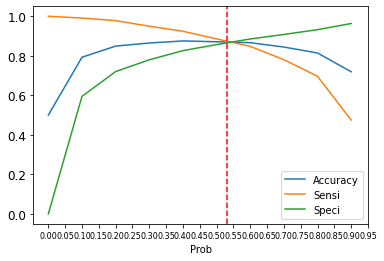

In [901]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(18,8))

cutoff_df.plot.line(x='Prob', y=['Accuracy','Sensi','Speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.53, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

Looking at the variance-bias trade off, choosing 0.53 as the decision boundary, so as to maximise both recall and precision

Performance on Train Data

In [902]:
Y_train_pred2 = Y_train_pred2['Subscription_Prob'].map( lambda x: 1 if x > 0.53 else 0)
report = classification_report(Y_resampled, Y_train_pred2)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2801
           1       0.87      0.87      0.87      2801

    accuracy                           0.87      5602
   macro avg       0.87      0.87      0.87      5602
weighted avg       0.87      0.87      0.87      5602



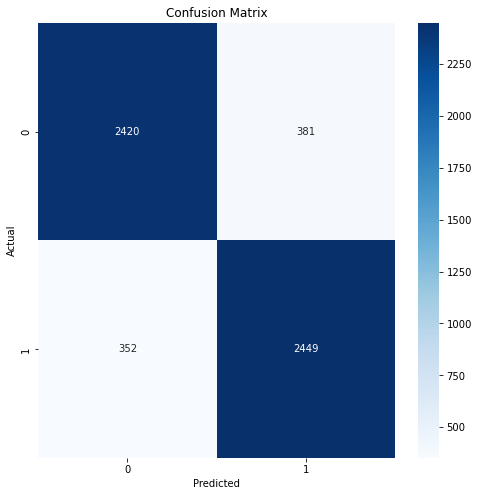

In [903]:
# Plotting the Confusion Matrix
draw_cm( Y_resampled, Y_train_pred2, "GnBu")

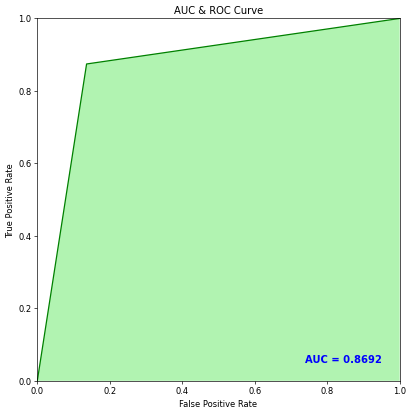

In [904]:
# Plotting ROC Curve

auc = metrics.roc_auc_score( Y_resampled, Y_train_pred2 )

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve( Y_resampled, Y_train_pred2 )

plt.figure(figsize=(12, 8), dpi=60)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [905]:
# Getting the cross validated score

threshold = 0.53
clf = LogisticRegression()

auc_roc = get_cross_validated_score(X_resampled, Y_resampled, clf, threshold)
print("AUC ROC: ", auc_roc)

AUC ROC:  0.9326615168794792


#### Now let's take a look how our model works on the test dataset

In [906]:
Y_test_pred2 = logreg.predict_proba(X_test_selected)
Y_test_pred2 = pd.DataFrame( Y_test_pred2[:, 1] )
Y_test_pred2.columns = ["Subscription_Prob"]
Y_test_pred2

,Subscription_Prob
0,0.080419
1,0.659860
2,0.039719
3,0.038450
4,0.009272
...,...
1352,0.563897
1353,0.009596
1354,0.555311
1355,0.130337


Performance on Test Data

In [907]:
Y_test_pred2 = Y_test_pred2['Subscription_Prob'].map( lambda x: 1 if x > 0.53 else 0)
report = classification_report(Y_test, Y_test_pred2)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1199
           1       0.41      0.68      0.51       158

    accuracy                           0.85      1357
   macro avg       0.68      0.77      0.71      1357
weighted avg       0.89      0.85      0.86      1357



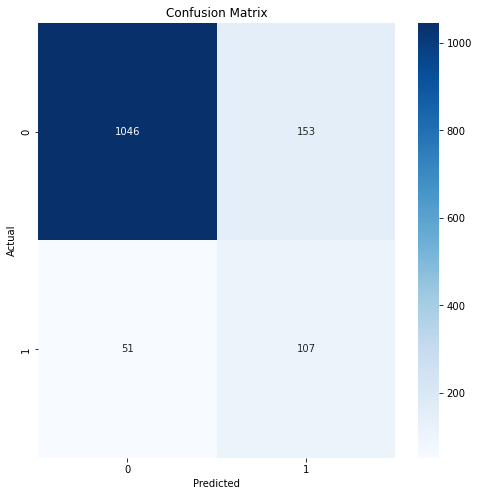

In [908]:
# Plotting the Confusion Matrix
draw_cm( Y_test, Y_test_pred2, "GnBu")

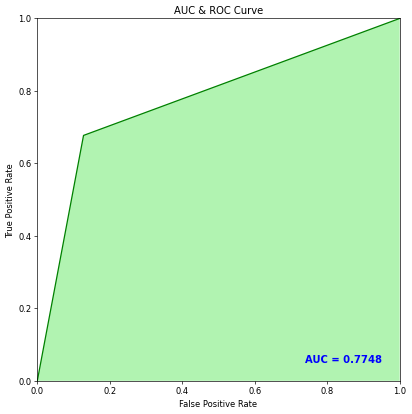

In [909]:
# Plotting ROC Curve

auc = metrics.roc_auc_score( Y_test, Y_test_pred2 )

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve( Y_test, Y_test_pred2 )

plt.figure(figsize=(12, 8), dpi=60)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [910]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_test_pred2)) 

print("Precision:",metrics.precision_score(Y_test, Y_test_pred2)) 

print("Recall:",metrics.recall_score(Y_test, Y_test_pred2))

print("F1 Score:",metrics.f1_score(Y_test, Y_test_pred2))

print("Balanced Accuracy:", balanced_accuracy_score(Y_test, Y_test_pred2))

Accuracy: 0.8496683861459101
Precision: 0.4115384615384615
Recall: 0.6772151898734177
F1 Score: 0.5119617224880382
Balanced Accuracy: 0.7748044256289524


Since, there is not much improvement by using SMOTE. So using undersampling instead of oversampling to see if there is an improvement in the result.

### Fitting the Model  with Logisitic Regression (using RandomUnderSampler)

In [911]:
rus = RandomUnderSampler(random_state = 69)
X_resampled1, Y_resampled1 = rus.fit_resample(X_train_selected, Y_train)

In [912]:
logreg = LogisticRegression()
logreg.fit(X_resampled1, Y_resampled1)

LogisticRegression()

In [913]:
Y_train_pred3 = logreg.predict_proba(X_resampled1)
Y_train_pred3 = pd.DataFrame( Y_train_pred3[:, 1] )
Y_train_pred3.columns = ["Subscription_Prob"]
Y_train_pred3

,Subscription_Prob
0,0.204745
1,0.059570
2,0.180359
3,0.210484
4,0.029460
...,...
721,0.852315
722,0.205933
723,0.519965
724,0.804518


In [914]:
# Finding the optimal decision boundary

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    Y_train_pred3[i] = Y_train_pred3.Subscription_Prob.map(lambda x: 1 if x > i else 0)

Y_train_pred3.head()

,Subscription_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.204745,1,1,1,0,0,0,0,0,0,0
1,0.059570,1,0,0,0,0,0,0,0,0,0
2,0.180359,1,1,0,0,0,0,0,0,0,0
3,0.210484,1,1,1,0,0,0,0,0,0,0
4,0.029460,1,0,0,0,0,0,0,0,0,0


In [915]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ["Prob", "Accuracy", "Sensi", "Speci", "Precision", "Recall"] )

num = [float(x)/10 for x in range(10)]

for i in num:
    cm1 = metrics.confusion_matrix(Y_resampled1, Y_train_pred3[i])
    total1 = sum(sum(cm1))
    
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(Y_resampled1, Y_train_pred3[i])
    
    cutoff_df.loc[i,] = [i,  accuracy, sensi, speci, prec[1], rec[1]]
cutoff_df

,Prob,Accuracy,Sensi,Speci,Precision,Recall
0.0,0.0,0.5,1.0,0.0,1.0,0.0
0.1,0.1,0.676309,0.991736,0.360882,0.608108,0.991736
0.2,0.2,0.77135,0.972452,0.570248,0.693517,0.972452
0.3,0.3,0.825069,0.944904,0.705234,0.762222,0.944904
0.4,0.4,0.847107,0.909091,0.785124,0.808824,0.909091
0.5,0.5,0.825069,0.826446,0.823691,0.824176,0.826446
0.6,0.6,0.812672,0.754821,0.870523,0.853583,0.754821
0.7,0.7,0.786501,0.672176,0.900826,0.871429,0.672176
0.8,0.8,0.738292,0.550964,0.92562,0.881057,0.550964
0.9,0.9,0.646006,0.319559,0.972452,0.920635,0.319559


<Figure size 1296x576 with 0 Axes>

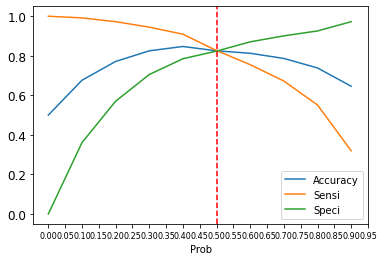

In [916]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(18,8))

cutoff_df.plot.line(x='Prob', y=['Accuracy','Sensi','Speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.5, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

Looking at the variance-bias trade off, choosing 0.5 as the decision boundary, so as to maximise both recall and precision

Performance on Train Data

In [917]:
Y_train_pred3 = Y_train_pred3['Subscription_Prob'].map( lambda x: 1 if x > 0.5 else 0)
report = classification_report(Y_resampled1, Y_train_pred3)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       363
           1       0.82      0.83      0.83       363

    accuracy                           0.83       726
   macro avg       0.83      0.83      0.83       726
weighted avg       0.83      0.83      0.83       726



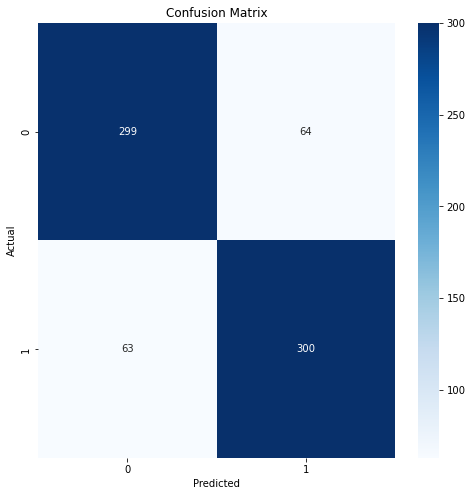

In [918]:
# Plotting the Confusion Matrix
draw_cm( Y_resampled1, Y_train_pred3, "GnBu")

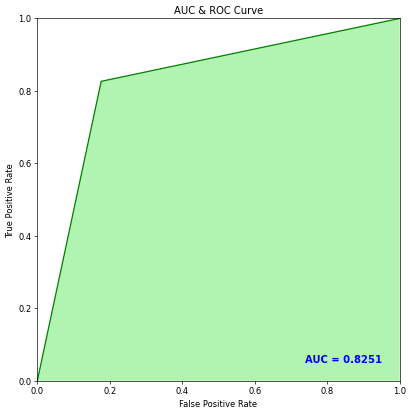

In [919]:
# Plotting ROC Curve

auc = metrics.roc_auc_score( Y_resampled1, Y_train_pred3 )

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve( Y_resampled1, Y_train_pred3 )

plt.figure(figsize=(12, 8), dpi=60)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [920]:
# Getting the cross validated score

threshold = 0.5
clf = LogisticRegression()

auc_roc = get_cross_validated_score(X_resampled1, Y_resampled1, clf, threshold)
print("AUC ROC: ", auc_roc)

AUC ROC:  0.8923270991013533


#### Now let's take a look how our model works on the test dataset

In [921]:
Y_test_pred3 = logreg.predict_proba(X_test_selected)
Y_test_pred3 = pd.DataFrame( Y_test_pred3[:, 1] )
Y_test_pred3.columns = ["Subscription_Prob"]
Y_test_pred3

,Subscription_Prob
0,0.205220
1,0.790601
2,0.086205
3,0.168711
4,0.022678
...,...
1352,0.558460
1353,0.026454
1354,0.480421
1355,0.333357


Performance on Test Data

In [922]:
Y_test_pred3 = Y_test_pred3['Subscription_Prob'].map( lambda x: 1 if x > 0.5 else 0)
report = classification_report(Y_test, Y_test_pred3)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.82      0.89      1199
           1       0.36      0.76      0.49       158

    accuracy                           0.82      1357
   macro avg       0.66      0.79      0.69      1357
weighted avg       0.89      0.82      0.84      1357



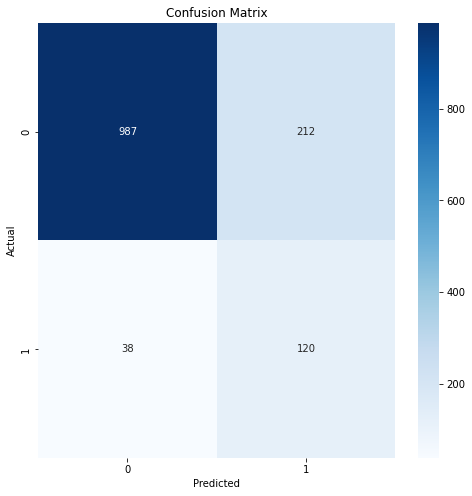

In [923]:
# Plotting the Confusion Matrix
draw_cm( Y_test, Y_test_pred3, "GnBu")

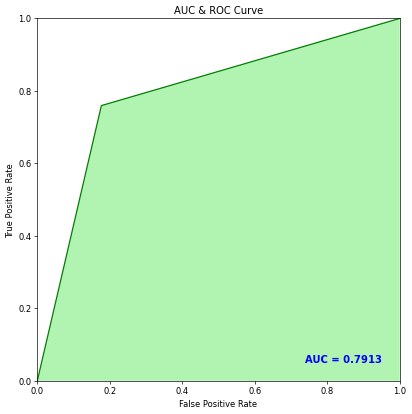

In [924]:
# Plotting ROC Curve

auc = metrics.roc_auc_score( Y_test, Y_test_pred3 )

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve( Y_test, Y_test_pred3 )

plt.figure(figsize=(12, 8), dpi=60)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [925]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_test_pred3)) 

print("Precision:",metrics.precision_score(Y_test, Y_test_pred3)) 

print("Recall:",metrics.recall_score(Y_test, Y_test_pred3))

print("F1 Score:",metrics.f1_score(Y_test, Y_test_pred3))

print("Balanced Accuracy:", balanced_accuracy_score(Y_test, Y_test_pred3))

Accuracy: 0.8157700810611643
Precision: 0.3614457831325301
Recall: 0.759493670886076
F1 Score: 0.4897959183673469
Balanced Accuracy: 0.7913398296048395


Now, let's use an ensemble model to the problem. We'll be using Random Forest particularly in this.

# Data Preparation

## ii) For Balanced Random Forest

In [926]:
bank2 = bank.copy()
bank2.shape

(4521, 17)

In [927]:
bank2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,3913,1,1,cellular,11,may,220,1,183,2,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,183,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,56,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,56,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
4518,56,technician,married,secondary,0,295,0,0,cellular,19,aug,151,6,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,183,2,other,0


In [928]:
cat_cols = bank2.select_dtypes(include = ['object']).columns
encoders = {}

for col in cat_cols:
    encoders[col] = LabelEncoder()
    bank2[col + '_encoded'] = encoders[col].fit_transform(bank2[col])

In [929]:
Y = bank2["y"]
X = bank2.drop(bank2.select_dtypes(include = ['object']).columns, axis = 1)
X = X.drop("y", axis = 1)

### Train-Test Split

In [930]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7,  test_size = 0.3, random_state = 69 )

In [931]:
# Checking the shape of the created Train & Test DFs

print(" Shape of X_train is : ",X_train.shape)
print(" Shape of Y_train is : ",Y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of Y_test is  : ",Y_test.shape)

 Shape of X_train is :  (3164, 16)
 Shape of Y_train is :  (3164,)
 Shape of X_test is  :  (1357, 16)
 Shape of Y_test is  :  (1357,)


### Training and Hyperparameter Tuning

In [932]:
# Define the scoring methods
accuracy_scorer = make_scorer(accuracy_score)
precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)
balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)

# Define the random forest classifier object
rfc = RandomForestClassifier()

# Define the parameters for the random search
param_dist = {"n_estimators": np.arange(10, 200, 10),
              "criterion": ["gini", "entropy"],
              "max_depth": [None, 5, 10, 15, 20, 30],
              "min_samples_split": np.arange(2, 20, 2),
              "min_samples_leaf": np.arange(1, 20, 2),
              "max_features": ["auto", "sqrt", "log2", None]}

# Define the random search object
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=50, cv=5, 
                                   scoring= {'balanced_accuracy':balanced_accuracy_scorer, 'recall':recall_scorer, 'precision': precision_scorer}, 
                                   refit = 'precision', n_jobs=-1)

# Fit the random search to the data
random_search.fit(X_train, Y_train)

# Get the best parameters
best_params = random_search.best_params_

# Define the final random forest classifier using the best parameters
rfc = RandomForestClassifier(**best_params, class_weight="balanced")

# Fit the final classifier to the data
rfc.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       max_features='sqrt', min_samples_leaf=19,
                       min_samples_split=14, n_estimators=170)

In [933]:
Y_train_pred4 = rfc.predict(X_train)
Y_train_pred4

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

Evaluation on Training Data

In [934]:
accuracy = accuracy_score(Y_train, Y_train_pred4)
precision = precision_score(Y_train, Y_train_pred4, average='weighted')
recall = recall_score(Y_train, Y_train_pred4, average='weighted')
balanced_accuracy = balanced_accuracy_score(Y_train, Y_train_pred4)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Balanced Accuracy:", balanced_accuracy)

Accuracy: 0.8492414664981036
Precision: 0.9196801849933812
Recall: 0.8492414664981036
Balanced Accuracy: 0.8680946297219706


In [935]:
report = classification_report(Y_train, Y_train_pred4)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      2801
           1       0.43      0.89      0.58       363

    accuracy                           0.85      3164
   macro avg       0.70      0.87      0.74      3164
weighted avg       0.92      0.85      0.87      3164



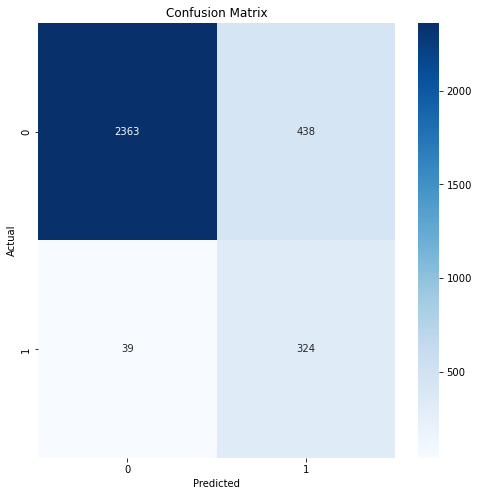

In [936]:
# Plotting the Confusion Matrix
draw_cm( Y_train, Y_train_pred4, "GnBu")

In [943]:
outcomes = zip(X_train.columns, rfc.feature_importances_)

#converting it to dataframe 

outcomes = pd.DataFrame(outcomes , columns = ["features","Importance"])
outcomes
# outcomes.plot.bar( y= "Importance",x = "features",figsize = (10,8))

,features,Importance
0,age,0.033535
1,default,0.000000
2,balance,0.064987
3,housing,0.031023
4,loan,0.006626
5,day,0.042597
6,duration,0.527581
7,campaign,0.022401
8,pdays,0.037668
9,previous,0.030332


Evaluation on Test Data

In [937]:
Y_test_pred4 = rfc.predict(X_test)
Y_test_pred4

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [938]:
accuracy = accuracy_score(Y_test, Y_test_pred4)
precision = precision_score(Y_test, Y_test_pred4, average='weighted')
recall = recall_score(Y_test, Y_test_pred4, average='weighted')
balanced_accuracy = balanced_accuracy_score(Y_test, Y_test_pred4)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:",metrics.f1_score(Y_test, Y_test_pred4))
print("Balanced Accuracy:", balanced_accuracy)

Accuracy: 0.8216654384672071
Precision: 0.8880328644787755
Recall: 0.8216654384672071
F1 Score: 0.4829059829059829
Balanced Accuracy: 0.7754431435478932


In [939]:
report = classification_report(Y_test, Y_test_pred4)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.84      0.89      1199
           1       0.36      0.72      0.48       158

    accuracy                           0.82      1357
   macro avg       0.66      0.78      0.69      1357
weighted avg       0.89      0.82      0.84      1357



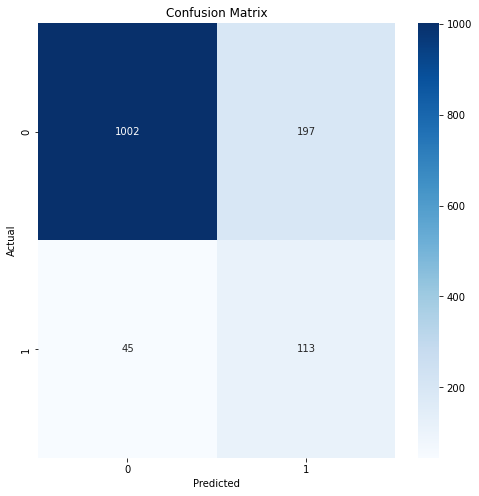

In [940]:
# Plotting the Confusion Matrix
draw_cm( Y_test, Y_test_pred4, "GnBu")

#### Here, balanced random forest seems to performs very well as compared to other models. 
#### So, this will be our final model.

# Conclusion + Performance Analysis

The results of the logistic regression models without treating the imbalanced class and with SMOTE and RandomUnderSampler indicate that all models struggle to balance the accuracy and precision, with the best results being seen in the SMOTE model with a balanced accuracy of 77.48%. The logistic regression models show a trade-off between precision and recall, with the SMOTE model having a higher recall (67.72%) and precision (41.15%) compared to the model without treating the imbalanced class (38.29% precision, 76.58% recall) and the model with RandomUnderSampler (36.14% precision, 75.95% recall). However, the F1 score, which is a measure of the harmonic mean between precision and recall, is not particularly high for any of the models, with the SMOTE model having the highest F1 score of 0.51. On the other hand, the Random Forest (balanced) model has a much higher precision (88.66%) and recall (82.31%) compared to the logistic regression models and a higher balanced accuracy (77.08%) and F1 score (0.48) than the SMOTE logistic regression model. These results suggest that the Random Forest (balanced) model is the best performing model in this evaluation.

<!-- Test data evaluation:

Logistic Regression without treating imbalanced class:
Accuracy: 0.8290346352247605
Precision: 0.3829113924050633
Recall: 0.7658227848101266
F1 Score: 0.510548523206751
Balanced Accuracy: 0.80159362760106

Logistic Regression with SMOTE:
Accuracy: 0.8496683861459101
Precision: 0.4115384615384615
Recall: 0.6772151898734177
F1 Score: 0.5119617224880382
Balanced Accuracy: 0.7748044256289524

Logistic Regression with RandomUnderSampler
Accuracy: 0.8157700810611643
Precision: 0.3614457831325301
Recall: 0.759493670886076
F1 Score: 0.4897959183673469
Balanced Accuracy: 0.7913398296048395

Random Forest (balanced) :
Accuracy: 0.8231392778187178
Precision: 0.8866427194476038
Recall: 0.8231392778187178
F1 Score: 0.4805194805194805
Balanced Accuracy: 0.7707820863377709 -->